<a href="https://colab.research.google.com/github/rehsani/Entropy/blob/master/entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entropy Estimation Using Quantile Spacing Approach**

We have developed a simple Quantile Spacing (QS) method for accurate probabilistic estimation of one-dimensional entropy from equiprobable random samples. In contrast to Bin Counting (BC) method, which uses equal-width bins with varying probability mass, the QS method uses estimates of the quantiles that divide the support of the data generating probability density function (pdf) into equal-probability-mass intervals. Whereas BC requires optimal
tuning of a bin-width hyper-parameter whose value varies with sample size and shape of the pdf, QS requires specification of the number of quantiles to be used. 

For the class of distributions tested, that the optimal number of quantile-spacings is a fixed fraction of the sample size (empirically determined to be ~0.25-0.35), and that this value is relatively insensitive to distributional form or sample size, providing a clear advantage over BC since
hyperparameter tuning is not required. 

Bootstrapping is used to approximate the sampling variability distribution of the resulting entropy estimate, and is shown to accurately reflect the true uncertainty. For the four distributional forms studied (Gaussian, Log-Normal, Exponential and Bimodal Gaussian Mixture), expected estimation bias
is less than 1% and uncertainty is relatively low even for very small sample sizes. We speculate that estimating quantile locations, rather than bin-probabilities, results in more efficient use of the information in the data to approximate the underlying shape of an unknown data generating pdf.

For more information please see the [manuscript](https://). 

If you have any question, feel free to contact us at hoshin@email.arizona.edu or rehsani@email.arizona.edu.

First, we need to import some required libraries:

In [18]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (3, 2)

First, let's take a look at the Entropy module:


In [15]:
import numpy as np
np.random.seed(42)
from typing import Sequence, Any

class entropy:

    def __init__(self, sample: Sequence[Any], alpha: float, N_b: int, N_k: int):
        
        """
        Uses Quantile Spacing (QS) method for accurate probabilistic estimation 
        of one-dimensional entropy from equiprobable random samples. QS method 
        uses estimates of the quantiles that divide the support of the data 
        generating probability density function (pdf) into 
        equal-probability-mass intervals. QS requires specification of the 
        'number of quantiles' (i.e., alpha) to be used. The optimal number of 
        quantile-spacings is a fixed fraction of the sample size 
        (empirically determined to be ~0.25), and this value is insensitive to 
        distributional form or sample size (for the class of distributions 
        tested).
        
        Parameters
        ------------------------------------------------------------------------
        sample : A sequence of numbers (e.g., list or numpy.ndarray)
            Sample for which entropy is estimated
            
        alpha : float, suggested value = 0.25
            Percent of the instances from the sample used for estimation of 
            entropy (i.e., number of quantile-spacings).
            
        N_b : int, suggested value = 500
            Number of bootstraps, used to approximate the sampling variability 
            distribution of the resulting entropy estimate
            
        N_k : int, suggested value = 500
            Number of sample subsets, used to estimate the sample distribution 
            for each quantile empirically
        
        """
        
        self.sample = np.array(sample)
        self.alpha = alpha
        self.N_b = N_b
        self.N_k = N_k
    

    def estimator(self):
        """
        Estimates entropy from the 'sample' using 'alpha' percent of instances.
    
        Returns
        ------------------------------------------------------------------------
        H : float
            Estimated entropy for the sample using 'alpha' percent of instances
        """
        
        n = np.ceil(self.alpha * self.sample.size).astype(np.int64)   
        x_min = self.sample.min()
        x_max = self.sample.max()
        self.sample.sort()
        H = []
        for i in range(self.N_b):
            sample_b = np.random.choice(self.sample[1:-1], self.sample.size)
            X_alpha = [np.random.choice(sample_b[1:-1], n, replace=False) 
                       for _ in range(self.N_k)]
            X_alpha = np.vstack(X_alpha)
            X_alpha.sort(axis=1)
            Z = np.hstack([x_min, X_alpha.mean(axis=0), x_max])
            dZ = np.diff(Z)
            h = 1 / (n + 1) * np.log((n + 1) * dZ).sum()
            H.append(h)
        return np.array(H)

Put the **entropy.py** file in the directory you are working with and import it as a library:

import entropy

**Example 1**

Here we use a sample of size 5,000 from a Guassian distribution ($\mu=0, \sigma=1$) with known true entropy ($H_{t}=1.419$) to test the algorithm:

In [16]:
mu = 0
sigma = 1
H_true = 0.5 * np.log(2*np.pi*np.exp(1)*sigma**2)

n = 5000
sample = np.random.normal(mu, sigma, n)
H = entropy(sample, alpha=0.25, N_b=100, N_k=500)
H = H.estimator()

Let's take a look at the estimated entropy:

Text(0.05, 0.9, 'True Entropy = 1.419 \nMean Estimated Entropy = 1.41 \n')

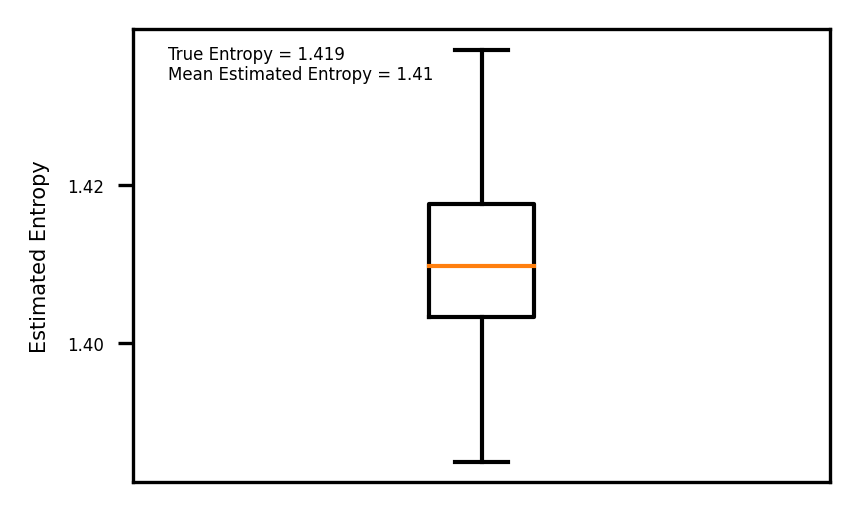

In [24]:
plt.boxplot(H)
plt.xticks([])
plt.ylabel('Estimated Entropy', fontsize=5)
plt.yticks(fontsize=4)
plt.text(0.05, 0.9,
         'True Entropy = {} \nMean Estimated Entropy = {} \n'.
         format(H_true.round(3), H.mean().round(3)),
         fontsize=4,
         horizontalalignment='left',
         verticalalignment='center',
         transform = plt.gca().transAxes)